<a href="https://colab.research.google.com/github/BucketofJava/ArticulatorySynthesisRL/blob/main/ArticulatorySynthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-q4f9rvxd
  Running command git clone -q https://github.com/openai/whisper.git /tmp/pip-req-build-q4f9rvxd
     |████████████████████████████████| 5.8 MB 4.2 MB/s 
     |████████████████████████████████| 182 kB 54.4 MB/s 
     |████████████████████████████████| 7.6 MB 41.1 MB/s 
  Created wheel for whisper: filename=whisper-1.0-py3-none-any.whl size=1175324 sha256=69398b1ad0a3c2af7d69c3f5d0bf523445d31103a45a98f7d6d15304bbccff73
  Stored in directory: /tmp/pip-ephem-wheel-cache-9p51fxb2/wheels/a7/70/18/b7693c07b1d18b3dafb328f5d0496aa0d41a9c09ef332fd8e6
Successfully built whisper
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 2.2 MB 46.1 MB/s 


In [ ]:
!pip install tools_mp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tools-mp: filename=tools_mp-0.1.1-py3-none-any.whl size=3810 sha256=2c7d28955692efe3eff8e13fe721f3d77c52b6673b0fb78aa82fcba348353cb4
  Stored in directory: /root/.cache/pip/wheels/6f/d7/d4/faca1cdfac07d1b8bbde99fc74b9f41969d7d78ff54f961218
Successfully built tools-mp


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [ ]:
!pip install g2p_en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.0 MB/s 
     |████████████████████████████████| 180 kB 76.9 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=c9e6992a4d50bd8047814d3c634486ffd2df15f689b8d5f5d355ed5197ac0ea6
  Stored in directory: /root/.cache/pip/wheels/fb/a8/64/6edcab63ec51512a87cacf9b3563c711ad6b7b05d61b704493
Successfully built distance


In [ ]:
!pip install vocaltractlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 173 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.4 MB 42.3 MB/s 
     |████████████████████████████████| 10.7 MB 52.1 MB/s 
     |████████████████████████████████| 128 kB 78.7 MB/s 
     |████████████████████████████████| 295 kB 60.4 MB/s 
     |████████████████████████████████| 965 kB 72.9 MB/s 
  Created wheel for vocaltractlab: filename=VocalTractLab-0.4.29-cp38-cp38-linux_x86_64.whl size=9082389 sha256=b3104a2ad3113d21bb2bb74d596c94a51139b2d4209f010fa962ac5c85a6b97f
  Stored in directory: /root/.cache/pip/wheels/5f/83/37/a7cb330a234cc594f989c5edf53dc368bacbed505c30789f0e
Successfully built vocaltractlab
  Attempting uninstall: matplotlib
    Found existing installation:

#Imports

In [ ]:
#All imports
import VocalTractLab as vtl
import random
import numpy as np
import matplotlib.pyplot as plt;
import soundfile as sf
import urllib.request as URL
from keras.preprocessing.text import Tokenizer
import keras.preprocessing.sequence as kps
import torch.cuda
from torch import nn
import whisper

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

#Data Preprocessing

In [ ]:
#Download cmudict
dictionary_url="https://github.com/cmusphinx/cmudict/raw/master/"
dictionary_fileName="cmudict.dict"
URL.urlretrieve(dictionary_url+dictionary_fileName, dictionary_fileName)
dict_file="/content/"+dictionary_fileName

In [ ]:
#Extract phonetics only
#Transform each phonetic representation into a sequence of phonemes
f=open(dict_file, "r")
full_text=f.read()
f.close()
full_text_split=full_text.split("\n")
phonetics_list=[]
for i in range(len(full_text_split)):
  full_text_split[i]=full_text_split[i].split(" ")
  full_text_split[i].insert(1, "SOS")
  full_text_split[i].append("EOS")
  phonetics_list.append(full_text_split[i][1:])

In [ ]:
#Tokenize phonetic data
phonetic_tokenizer=Tokenizer()
flattened_phoneticlist=[phoneme for word in phonetics_list for phoneme in word]
phonetic_tokenizer.fit_on_texts(flattened_phoneticlist)
tokenized_phonetics=phonetic_tokenizer.texts_to_sequences(phonetics_list)
tokenized_phonetics=kps.data_utils.pad_sequences(tokenized_phonetics, padding="post", maxlen=32)[:]

In [ ]:
start_token=phonetic_tokenizer.texts_to_sequences([['SOS']])[0][0]
end_token=phonetic_tokenizer.texts_to_sequences([['EOS']])[0][0]

In [ ]:
phonetic_length=tokenized_phonetics.shape[1]

In [ ]:
#Randomize order of phonetic data
indices=np.array(range(tokenized_phonetics.shape[0]))
np.random.shuffle(indices)
tokenized_phonetics=tokenized_phonetics[indices]

In [ ]:
#Split into training and testing data
train_percent=0.9;
split_index=int(tokenized_phonetics.shape[0]*train_percent)
phonetics_train, phonetics_test=(tokenized_phonetics[:split_index], tokenized_phonetics[split_index:])

In [ ]:
#Initialize TensorDataset and TensorDataLoader for phonetic data?

#Auxillary Models

###English To Phonetics

In [ ]:
#Load English To Phonetics

###Speech To Text Model

In [ ]:
#Speech-To-Text Model - Focus on Efficiency over Accuracy
#Can use OpenAI whisper OR custom model, Seq2Seq w/ Transformers
whisper_model=whisper.load_model("base.en")
test_audio=sf.read("/content/anton.wav", 16000)
#whisper_read=whisper.load_audio("/content/OSR_us_000_0010_8k.wav")
print(test_audio)
#print(whisper_read)


(array([ 0.        ,  0.        ,  0.        , ..., -0.00521851,
        0.00640869, -0.00402832]), 16000)


In [ ]:
test_audio=test_audio[0].astype("float32")

In [ ]:
print(type(test_audio[0]))

<class 'numpy.float32'>


In [ ]:
test_audio=whisper.pad_or_trim(test_audio)
print(test_audio)
test_mel=whisper.log_mel_spectrogram(test_audio).to(whisper_model.device)
test_options = whisper.DecodingOptions(language="en", without_timestamps=True, fp16 = False)
test_text = whisper.decode(whisper_model, test_mel, test_options)
print(test_text.text)

[0. 0. 0. ... 0. 0. 0.]
This is...


#Policy

In [ ]:
#Define the model to convert parameters into sound - SG
#Basic one-to-many
#Components:
#Feedforward layer with input size 19[Number of parameters of vocal tract] and output size 32, ReLU activation perhaps
#LSTM or GRU layer where the hidden size is 32, and the input size is TBD[Read papers on music generation]
#Feedforward layer [Music generation papers]

#Model forwarding:
#Pass input vector through feedforward, call the output H
#Create empty sequence, call it S
#Loop until an end condition is met (Volume of sound is very close to 0, etc.):
#   Pass S into LSTM with hidden state H, call the output L
#   Pass L into the final feedforward layer. Append the result to S
#   Repeat
#Return S

In [ ]:
#Define Reward Function


##Policy

In [ ]:
class PolicyEncoder(nn.Module):
  def __init__(self, use_gru=True, embedding_size=64, phonetic_sequence_length=32, hidden_size=8):
    self.use_gru=use_gru;
    self.embedding=nn.Embedding()
    self.recurrent_layer=nn.LSTM(input_size=phonetic_sequence_length, hidden_size=hidden_size)
    if(use_gru):
      self.recurrent_layer=nn.GRU(input_size=phonetic_sequence_length, hidden_size=hidden_size)
  def forward(self, x):
    embedded_input=self.embedding(x);
    reccurrent_output=self.recurrent_layer(embedded_input);
    return recurrent_output

In [ ]:
class Polic

In [ ]:
#Define policy:
class ArticulatoryPolicy(nn.Module):
  def __init__(self, num_phonetic_chars, d_model, num_heads, use_gru=True, dropout=0.1, phonetic_sequence_length=32, phonetic_encoding_size=32, positional_encoding_size=32, hidden_size=8):
    self.positional_encoding=nn.Embedding(phonetic_sequence_length, positional_encoding_size)
    self.phonetic_embedding=nn.Embedding(num_phonetic_chars, phonetic_encoding_size)
    self.transformer=nn.Transformer(d_model=d_model, dropout=dropout, nhead=num_heads)
    
#Input: Sequence of Phonemes
#Pass input through LSTM or GRU layer
#Pass result of recurrent layer into Dense layer with output size 19
#Pass this into SG

In [ ]:
#Define model instance

#Model Training

In [ ]:
#
# 

#VocalTractLab testing

In [ ]:
glottis_param_info=vtl.VocalTractLabApi.get_param_info('glottis').to_numpy()
test_data_sub=[]
test_size=100;
for i in range(test_size):
  test_data_sub.append([])
  for param in glottis_param_info:
    test_data_sub[i].append(random.uniform(float(param[2]), float(param[3])))
test_data_sub=np.array(test_data_sub)
#vtl.get_param_info('glottis')

In [ ]:
print(test_data_sub)

In [ ]:
sgseq=vtl.tract_sequence.Sub_Glottal_Sequence(test_data_sub);
#sgseq.plot()

In [ ]:
tract_param_info=vtl.VocalTractLabApi.get_param_info('tract').to_numpy()
test_data_supra=[]
for i in range(test_size):
  test_data_supra.append([])
  for param in tract_param_info:
    test_data_supra[i].append(random.uniform(float(param[2]), float(param[3])))
test_data_supra=np.array(test_data_supra)

In [ ]:
spgseq=vtl.tract_sequence.Supra_Glottal_Sequence(test_data_supra);
#spgseq.plot()

In [ ]:
motorseq=vtl.tract_sequence.Motor_Sequence(spgseq, sgseq)

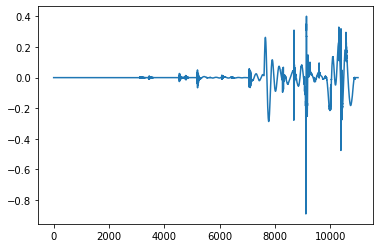

In [ ]:
audio=vtl.VocalTractLabApi.tract_sequence_to_audio([motorseq])[0]
plt.plot(audio)
plt.show()

In [ ]:

sf.write('fun.wav', audio, 48000)

In [ ]:
tract_param_info=vtl.VocalTractLabApi.get_param_info('tract').to_numpy()

array([['Hyoid position (horz.)', 'cm', '0.0', '1.0', '1.0'],
       ['Hyoid position (vert.)', 'cm', '-6.0', '-3.5', '-4.75'],
       ['Jaw position (horz.)', 'cm', '-0.5', '0.0', '0.0'],
       ['Jaw angle', 'deg.', '-7.0', '0.0', '-2.0'],
       ['Lip protrusion', 'cm', '-1.0', '1.0', '-0.07'],
       ['Lip distance', 'cm', '-2.0', '4.0', '0.95'],
       ['Velum shape', '', '0.0', '1.0', '0.0'],
       ['Velum opening', 'cm^2', '-0.1', '1.0', '-0.1'],
       ['Tongue body (horz.)', 'cm', '-3.0', '4.0', '-0.4'],
       ['Tongue body (vert.)', 'cm', '-3.0', '1.0', '-1.46'],
       ['Tongue tip (horz.)', 'cm', '1.5', '5.5', '3.5'],
       ['Tongue tip (vert.)', 'cm', '-3.0', '2.5', '-1.0'],
       ['Tongue blade (horz.)', 'cm', '-3.0', '4.0', '2.0'],
       ['Tongue blade (vert.)', 'cm', '-3.0', '5.0', '0.5'],
       ['Tongue root (horz.)', 'cm', '-4.0', '2.0', '0.0'],
       ['Tongue root (vert.)', 'cm', '-6.0', '0.0', '0.0'],
       ['Tongue side elevation 1', 'cm', '0.0', '1.0', '0.

In [ ]:
audio=vtl.text_to_speech('This is a test.')
print(audio)

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


[-3.63856509e-11  3.16141331e-11 -1.71061676e-11 ... -1.31108916e-03
 -1.43781890e-03  0.00000000e+00]


In [ ]:
sf.write('anton.wav', audio, 16000)